In [29]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [30]:
X, y = load_diabetes(return_X_y=True)

In [31]:
X_df = pd.DataFrame(X, columns = [f'Feature_{i+1}' for i in range(X.shape[1])])
X_df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [84]:
col= X_df.columns
for index in col:
     print(index)

Feature_1
Feature_2
Feature_3
Feature_4
Feature_5
Feature_6
Feature_7
Feature_8
Feature_9
Feature_10


In [32]:
y_df = pd.DataFrame(y, columns = ['Target'])
y_df

,Target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [33]:
df = pd.concat([X_df, y_df], axis = 1) 
df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [34]:
X = df.drop('Target', axis = 1)
y = df.Target

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = .3, # 30% of data for testing
                                                   shuffle = True, # Shuffling values
                                                   random_state = 42)

In [36]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [37]:
X_train

,const,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
225,1.0,0.030811,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063015,0.003064
412,1.0,0.074401,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006207,0.085907
118,1.0,-0.056370,0.050680,-0.010517,0.025315,0.023198,0.040022,-0.039719,0.034309,0.020609,0.056912
114,1.0,0.023546,-0.044642,0.110198,0.063187,0.013567,-0.032942,-0.024993,0.020655,0.099241,0.023775
364,1.0,0.001751,0.050680,-0.006206,-0.019442,-0.009825,0.004949,-0.039719,0.034309,0.014821,0.098333
...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920
270,1.0,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641,0.015491
348,1.0,0.030811,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078
435,1.0,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357


In [38]:
X_train

,const,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
225,1.0,0.030811,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063015,0.003064
412,1.0,0.074401,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006207,0.085907
118,1.0,-0.056370,0.050680,-0.010517,0.025315,0.023198,0.040022,-0.039719,0.034309,0.020609,0.056912
114,1.0,0.023546,-0.044642,0.110198,0.063187,0.013567,-0.032942,-0.024993,0.020655,0.099241,0.023775
364,1.0,0.001751,0.050680,-0.006206,-0.019442,-0.009825,0.004949,-0.039719,0.034309,0.014821,0.098333
...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920
270,1.0,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641,0.015491
348,1.0,0.030811,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078
435,1.0,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357


In [39]:
X_train.shape

(309, 11)

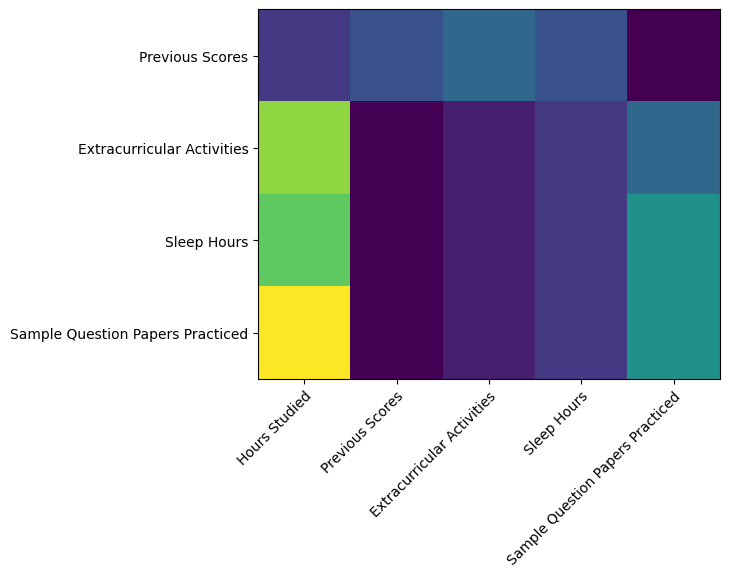

In [82]:
b = np.array([[4, 5, 6, 5, 2],[12, 2, 3, 4, 6],[11, 2, 3, 4, 8],[14, 2, 3, 4, 8]])
v1= ["Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]
v2= ["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]
 
fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(v2)), labels=v2)
ax.set_yticks(np.arange(len(v1)), labels=v1)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
im = ax.imshow(b)
plt.show()